<a href="https://colab.research.google.com/github/duongnghiephuy/Practice-Deep-learning-/blob/master/digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras import layers
from keras import models
from matplotlib import pyplot as plt
from keras.utils import to_categorical

(train_data,train_label),(test_data,test_label)=mnist.load_data()
print("Shape of training data:",train_data.shape)  
print("Shape of test data:",test_data.shape)  


Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
Shape of training data: (60000, 28, 28)
Shape of test data: (10000, 28, 28)


Before attempting to set up a model, we take a first look into the shape of our data.
Interpreting from shape, the training set consists of 60000 digit images of height 28, width 28. The feature of each image is therefore a matrix of 28_28 integers indicating the value of 28_28 pixels.


To visualize, plot an image.


The label of this digit image is: 5


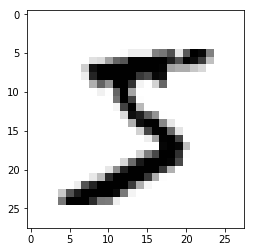

In [3]:
plt.imshow(train_data[0],cmap=plt.cm.get_cmap("binary"))
print("The label of this digit image is:",train_label[0])


In [0]:
train_data=train_data.reshape(60000,28*28)
train_data=train_data.astype("float32")/255 
test_data=test_data.reshape(10000,28*28)
test_data=test_data.astype("float32")/255 

train_label=to_categorical(train_label)
test_label=to_categorical(test_label)

Before feeding data into the model, it is necessary to process because the Dense layer in Keras is only capable of crunching 2D tensor of float type.

We turn data into 2D tensor of float consisting of (example,features)

Why do we have to normalize the data?

There is a great disparity in accuracy results achieved by train data with scaling and train data without scaling. 

In my experiment,the latter is around 80% while the former reaches 98%.

There are severals reasons for this:
- Large input data results in large learned weights, which leads to an unstable model. 
In other words, it is sensitive to input values.Small weights are preferable.

- Large input data also causes  the gradient to explode which is detrimental

- In my first layer, the activation function is relu (which involves exponential function) while the initialized weights are small. Without scaling, lots of data may be reduced to 0. 

Encode the label:
If we keep the original format, we will feed a list of integers to the model. 
Number 1 has label 1,etc. 

Problems:
If the true label result is (1,5,6) , the model infers that (1,5,7) is closer to the truth than (1,5,9) based on distance
even though there is 1 wrong prediction in each case.

By econding, 5 is encoded as [0 0 0 0 1 0 0 0 0 0 ].


In [6]:
model=models.Sequential()

model.add(layers.Dense(512,input_shape=(28*28,),activation="relu"))

model.add(layers.Dense(10,activation="softmax"))

model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

model.fit(train_data,train_label,epochs=5,batch_size=128)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





60000/60000 [==============================] - 6s 98us/step - loss: 1.4609 - acc: 0.6760
Epoch 2/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.5830 - acc: 0.8529
Epoch 3/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.4109 - acc: 0.8887
Epoch 4/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.3533 - acc: 0.9007
Epoch 5/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.3233 - acc: 0.9072


Model structure:
 - Linear stack of layers.
 - The first hidden unit receives the train data, has activation function relu, and outputs (512,)
 - The output unit ouputs a 10D vector for each data point by function softmax

The optimizer rmsprop performs better than pure stochastic gradient descent. We don't fine tuning the learning rate here.

Due to the nature of softmax, loss function based on maximum likelihood is a good choice

Metrics doesn't contribute anything but represents the final quality of trained model.

Train model. Batch size is the size of data that loss function works on and sends feedback to the optimizer.


*The training accuracy is 90%, which proves the power of neural network. *
 

In [9]:
model.evaluate(test_data,test_label)


10000/10000 [==============================] - 1s 57us/step


[0.30260811639428137, 0.9131]

The generalization is quite good 91%

In [12]:
pred=model.predict(test_data[0:1])
print("Output of the first data point in test set:",pred)
print("Predicted label:",pred.argmax())
print(test_label[0])

Output of the first data point in test set: [[3.6634458e-05 3.5170903e-08 1.7223903e-05 3.7405707e-04 1.0641301e-06
  2.5084903e-05 6.1402967e-09 9.9819070e-01 7.5834660e-06 1.3474977e-03]]
Predicted label: 7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Given an input, softmax produces the probabilities of belonging to labels
The above is a true prediction.